<a href="https://colab.research.google.com/github/Skynet2001/prototype1/blob/main/dataset_preparacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


1.  https://universe.roboflow.com/uav-cmkao/uav-6oylx \     eliminar DST  DOM HMN GHM  (BRT LBT SE CONVERTIRAN EN BRT)

In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="JkB5NQeg7Aa4ggvs4lzQ")
project = rf.workspace("uav-cmkao").project("uav-6oylx")
version = project.version(7)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to uav-7 in yolov11:: 100%|██████████| 19968/19968 [00:03<00:00, 5044.64it/s]


In [ ]:
import os

# Definir las rutas de las carpetas
carpetas = [
    '/content/uav-7/test/labels',
    '/content/uav-7/train/labels',
    '/content/uav-7/valid/labels'
]

for carpeta in carpetas:
    # Listar todos los archivos txt en la carpeta
    archivos = [f for f in os.listdir(carpeta) if f.endswith('.txt')]

    for nombre_archivo in archivos:
        ruta_completa = os.path.join(carpeta, nombre_archivo)

        # Leer y filtrar líneas
        lineas_filtradas = []
        with open(ruta_completa, 'r') as archivo:
            lineas = archivo.readlines()

        for linea in lineas:
            # Saltar líneas vacías
            if not linea.strip():
                continue

            # Dividir la línea en componentes
            partes = linea.strip().split()

            # Si el primer elemento es 0, mantener la línea
            if partes and partes[0] == '0':
                lineas_filtradas.append(linea)

        # Escribir las líneas filtradas de vuelta al archivo
        with open(ruta_completa, 'w') as archivo:
            archivo.writelines(lineas_filtradas)

print("Proceso completado: todas las líneas que no empiezan con 0 han sido eliminadas.")

Proceso completado: todas las líneas que no empiezan con 0 han sido eliminadas.


In [ ]:
from google.colab import drive
import zipfile
import os

# Montar Google Drive solo si no está montado
if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
    print("Drive montado exitosamente!")
else:
    print("Drive ya estaba montado - Continuando...")

# Rutas actualizadas con verificación
origen = '/content/uav-7'
destino_zip = '/content/drive/MyDrive/uav-7.zip'

# Verificar existencia de la carpeta origen
if not os.path.exists(origen):
    raise FileNotFoundError(f"⚠️ La carpeta {origen} no existe!")

# Crear archivo ZIP con progreso
print(f"\nIniciando compresión de: {origen}")
total_archivos = 0

with zipfile.ZipFile(destino_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(origen):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, origen)
            zipf.write(file_path, arcname=arcname)
            total_archivos += 1
            if total_archivos % 100 == 0:
                print(f"Comprimidos {total_archivos} archivos...")

print(f"\n✅ ¡Compresión exitosa! Archivo final: {destino_zip}")
print(f"Total de archivos comprimidos: {total_archivos}")

Drive ya estaba montado - Continuando...

Iniciando compresión de: /content/uav-7
Comprimidos 100 archivos...
Comprimidos 200 archivos...
Comprimidos 300 archivos...
Comprimidos 400 archivos...
Comprimidos 500 archivos...
Comprimidos 600 archivos...
Comprimidos 700 archivos...
Comprimidos 800 archivos...
Comprimidos 900 archivos...
Comprimidos 1000 archivos...
Comprimidos 1100 archivos...
Comprimidos 1200 archivos...
Comprimidos 1300 archivos...
Comprimidos 1400 archivos...
Comprimidos 1500 archivos...
Comprimidos 1600 archivos...
Comprimidos 1700 archivos...
Comprimidos 1800 archivos...
Comprimidos 1900 archivos...
Comprimidos 2000 archivos...
Comprimidos 2100 archivos...
Comprimidos 2200 archivos...
Comprimidos 2300 archivos...
Comprimidos 2400 archivos...
Comprimidos 2500 archivos...
Comprimidos 2600 archivos...
Comprimidos 2700 archivos...
Comprimidos 2800 archivos...
Comprimidos 2900 archivos...
Comprimidos 3000 archivos...
Comprimidos 3100 archivos...
Comprimidos 3200 archivos...

In [ ]:
from google.colab import drive
import zipfile
import shutil
import os

# Montar Google Drive (sin mensajes redundantes)
drive.mount('/content/drive', force_remount=False)

# Configurar rutas
zip_en_drive = '/content/drive/MyDrive/nuevodataset/uav-7.zip'  # Ruta del ZIP en Drive
dir_destino = '/content/uav-7'                     # Destino en Colab
zip_temporal = '/content/temp_uav7.zip'            # Ruta temporal para copia

# 1. Copiar el ZIP a entorno Colab
try:
    shutil.copy(zip_en_drive, zip_temporal)
    print("✅ ZIP copiado desde Drive a Colab")
except FileNotFoundError:
    raise Exception(f"⚠️ No se encontró {zip_en_drive} en Drive")

# 2. Preparar directorio de destino
if os.path.exists(dir_destino):
    shutil.rmtree(dir_destino)  # Eliminar si ya existe
os.makedirs(dir_destino)        # Crear directorio limpio

# 3. Descomprimir archivo
with zipfile.ZipFile(zip_temporal, 'r') as zip_ref:
    zip_ref.extractall(dir_destino)
    print(f"Descomprimiendo: {len(zip_ref.infolist())} archivos...")

# 4. Limpiar archivo temporal
os.remove(zip_temporal)

# Verificar estructura resultante
print("\nEstructura reconstruida:")
!find {dir_destino} -type d | sed -e 's/[^-][^\/]*\//--/g' -e 's/--/├── /'

print(f"\n✅ Proceso completado! Carpeta disponible en: {dir_destino}")

Mounted at /content/drive
✅ ZIP copiado desde Drive a Colab
Descomprimiendo: 19959 archivos...

Estructura reconstruida:
├── uav-7
├── --train
├── ----images
├── ----labels
├── --valid
├── ----images
├── ----labels
├── --test
├── ----images
├── ----labels

✅ Proceso completado! Carpeta disponible en: /content/uav-7


In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!yolo detect train data=/content/uav-7/data.yaml model=yolo11n.pt epochs=50 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 5.35M/5.35M [00:00<00:00, 333MB/s]
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/uav-7/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybr

In [ ]:
from google.colab import drive
import zipfile
import os

# Montar Google Drive solo si no está montado
if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
    print("Drive montado exitosamente!")
else:
    print("Drive ya estaba montado - Continuando...")

# Rutas actualizadas con verificación
origen1 = '/content/runs'
destino_zip1 = '/content/drive/MyDrive/runs.zip'

# Verificar existencia de la carpeta origen
if not os.path.exists(origen1):
    raise FileNotFoundError(f"⚠️ La carpeta {origen1} no existe!")

# Crear archivo ZIP con progreso
print(f"\nIniciando compresión de: {origen1}")
total_archivos = 0

with zipfile.ZipFile(destino_zip1, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(origen1):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, origen1)
            zipf.write(file_path, arcname=arcname)
            total_archivos += 1
            if total_archivos % 100 == 0:
                print(f"Comprimidos {total_archivos} archivos...")

print(f"\n✅ ¡Compresión exitosa! Archivo final: {destino_zip1}")
print(f"Total de archivos comprimidos: {total_archivos}")

Drive ya estaba montado - Continuando...

Iniciando compresión de: /content/runs

✅ ¡Compresión exitosa! Archivo final: /content/drive/MyDrive/runs.zip
Total de archivos comprimidos: 26


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/shawarma.jpg: 256x640 1 BRT, 297.1ms
Speed: 20.3ms preprocess, 297.1ms inference, 27.5ms postprocess per image at shape (1, 3, 256, 640)


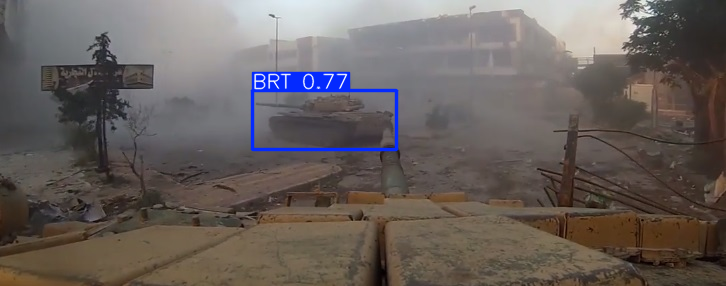

In [2]:
from ultralytics import YOLO
# Load the YOLO11 model
model = YOLO('/content/best.pt')
# Run inference on an image
results = model('/content/shawarma.jpg')
# Display results
results[0].show()